# Laboratory 6 - Rootfinding algorithms
#### Grzegorz Fotyga

## 1 Introduction

The goal of the lab is to implement two root-finding algorithms, the bisection method and the secant method, and use them to solve the following two problems:

### Problem 1 
Figure 1 shows a circuit with a resistor, an inductor, and a capacitor in parallel. Kirchhoff’s rules can be used to express the impedance magnitude of the system as follows:

$|Z| = \dfrac{1}{\sqrt{\dfrac{1}{R^2} + (\omega C - \dfrac{1}{\omega L})^2}}  \   \   \   \  (1)$       


where $\omega$ is the angular frequency. Find the $\omega$ that results in an impedance of $75 \Omega$. For the following parameters: R = $725\Omega$, C = 8 $\cdot$ 10e−5F, L = 2H, with initial interval $\omega \in \left< 1,50 \right>$  and $\epsilon_f$ = 1e−12.


### Problem 2

The upward velocity of a rocket can be computed by the following formula 

$v = u \text{ln}\left(\dfrac{m_0}{m_0 - qt} \right) - gt     \  \    \  \    (2)$    


where $t$ denotes the time, $v$ is the upward velocity, $m_0$ - the initial mass of the rocket at time $t = 0$, $u$ - the velocity at which fuel is expelled relative to the rocket, $q$ - the fuel consumption rate, $g = 9.81m/s2$ - the downward acceleration of gravity. Compute the time, at which $v = 750m/s$, assuming $m_0 = 150000kg$, $q = 2700kg/s$, $u = 2000m/s$. Set the initial interval to: $t \in \left< 1, 50 \right>$, and the tolerance to: $\epsilon_f$ = 1e−12.



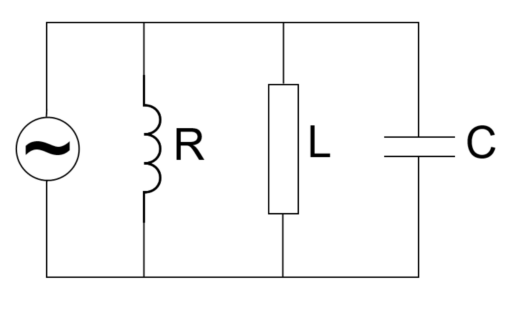

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('circuit.png')
imgplot = plt.imshow(img)
plt.axis('off')  
plt.show()

### Task 1

- Define a function whose input parameter is $\omega$ and output parameter is impedance $Z$, based on formula (1).
- Define a function whose input parameter is a time $t$ and output parameter is velocity $v$, based on formula (2).


In [36]:
import math
import numpy as np

def ImpedanceCalculator(omega):
    r = 725
    c = 8 * 10e-5
    l = 2
    first = 1 / (r * r)
    second = omega * c - 1 / (omega * l)
    return 1/math.sqrt( (first + second * second))

def VelocityCalculator(time):
    m0 = 150000
    q = 2700
    u = 2000
    g = 9.81
    return u * math.log( (m0 / ( m0 - q * time))) - g * time

print(ImpedanceCalculator(1))
print(ImpedanceCalculator(50))
print(ImpedanceCalculator(18.049586))
print(VelocityCalculator(21.132417))

2.003197481615657
33.29815766509095
75.0000011249263
750.0000900169638


### Task 2

Implement bisection algorithm in a form of a function with the following input parameters: 
- initial interval - floats: $a$ and $b$ 
- tolerance: $\epsilon_f = 1e-12$ 

Specify two stopping criterions:
- absoulte value of a function in the middle of subregion will drop below $\epsilon_f$
or:
- width of subregion drops below $\epsilon_f$

Output of a function:
- root
- number of iterations

Test your bisection algorithm on a simple function (suggest one!)

In [16]:
import math

def bisection_algorithm(f, a, b, epsilon_f=1e-12):
    if f(a) * f(b) >= 0:
        print("The function must have different signs at a and b")
        return
    
    iterations = 0
    while (b - a) / 2 > epsilon_f:
        midpoint = (a + b) / 2
        f_midpoint = f(midpoint)
        
        if abs(f_midpoint) < epsilon_f:
            return midpoint, iterations
        
        if f(a) * f_midpoint < 0:
            b = midpoint
        else:
            a = midpoint
        
        iterations += 1

    midpoint = (a + b) / 2
    return midpoint, iterations

# Define a simple function for testing: f(x) = x^2 - 2
def test_function(x):
    return x- 2 

# Test the bisection algorithm on the test function
root, iterations = bisection_algorithm(test_function, -10, 10)
print(f"Root: {root}, Iterations: {iterations}")



Root: 2.0000000000004547, Iterations: 42


### Task 3

Implement secant algorithm in a form of a function with the following input parameters: 
- the first two points - floats: $a$ and $b$ 
- tolerance: $\epsilon_f = 1e-12$ 

Specify a stopping criterion:
- absoulte value of a function in the current point will drop below $\epsilon_f$

Output of a function:
- root
- number of iterations

Test your secant algorithm on a simple function (suggest one!)

In [33]:
def SecantAlgorithm(f, x0, x1, epsilon=1e-12, max_iterations=1000):
    iterations = 0
    f_x0 = f(x0)
    f_x1 = f(x1)
    
    while abs(x1 - x0) > epsilon and iterations < max_iterations:
        if abs(f_x1 - f_x0) < epsilon:
            print("The difference in function values is too small. Secant method may fail.")
            break  # Avoid division by a small number
        
        x_new = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        x0 = x1
        x1 = x_new
        f_x0 = f_x1
        f_x1 = f(x1)
        
        iterations += 1
        
        if abs(f_x1) < epsilon:
            break  # Stopping criterion based on function value

    return x1, iterations

# Define a simple function for testing: f(x) = x^2 - 4
def test_function(x):
    return x - 4

# Test the Secant algorithm on the test function
root, iterations = SecantAlgorithm(test_function, -100, 10)
print(f"Root: {root}, Iterations: {iterations}")


Root: 4.0, Iterations: 1


### Task 4

Test your algorithms on the real problems specified in the previous points. How many iterations did each method take to converge? What is the value of $\omega$ and $t$ you are looking for?

In [37]:

def ImpedanceCalculator_75(omega):
    return ImpedanceCalculator(omega) - 75

def VelocityCalculator_750(time):
    return VelocityCalculator(time) - 750

root, iterations = bisection_algorithm(ImpedanceCalculator_75, 1, 50)
print(f"Root: {root}, Iterations: {iterations}")
root, iterations = SecantAlgorithm(ImpedanceCalculator_75, 1, 50)
print(f"Root: {root}, Iterations: {iterations}")

root, iterations = bisection_algorithm(VelocityCalculator_750, 1, 50)
print(f"Root: {root}, Iterations: {iterations}")
root, iterations = SecantAlgorithm(VelocityCalculator_750, 1, 50)
print(f"Root: {root}, Iterations: {iterations}")

The function must have different signs at a and b
Root: 18.04958591388136, Iterations: 45
The difference in function values is too small. Secant method may fail.
Root: -5.544660280838136e+31, Iterations: 9
Root: 21.13241513592571, Iterations: 45
Root: 21.132415135926294, Iterations: 8


### Task 5

As the output data in the Bisection and Secant algorithms, add a vector storing subsequent absolute values of the function (in subsequent root approximations). Plot this vector. What can you say about the convergence?

Hint: In subsequent iterations, you compute approximate values of the root as well as the absolute values of the analyzed function at these points. The goal here is to plot (using the plt.semilogy() function) the absolute values of the function. For the last iteration, it should be below 1e-12.

Focus on the convergence rates. Is it linear? Quadratic? Compare it with the results shown in the lecture slides.

[2.28517000e+02 3.35052287e+02 8.23453782e+01 6.44979297e+01
 1.08786378e+01 2.62989506e+01 7.58534331e+00 1.67750338e+00
 2.94616300e+00 6.32395962e-01 5.23036498e-01 5.45589508e-02
 2.34268958e-01 8.98625514e-02 1.76536873e-02 1.84521599e-02
 3.99118351e-04 8.62731398e-03 4.11410519e-03 1.85749526e-03
 7.29188916e-04 1.65035398e-04 1.17041448e-04 2.39969821e-05
 4.65222309e-05 1.12626240e-05 6.36717937e-06 2.44772230e-06
 1.95972848e-06 2.43996965e-07 8.57865871e-07 3.06934453e-07
 3.14689714e-08 1.06264110e-07 3.73978537e-08 2.96438429e-09
 1.42522367e-08 5.64375569e-09 1.33979938e-09 8.12406142e-10
 2.63867150e-10 2.74440026e-10 5.22959454e-12 1.29034561e-10
 6.20730134e-11]


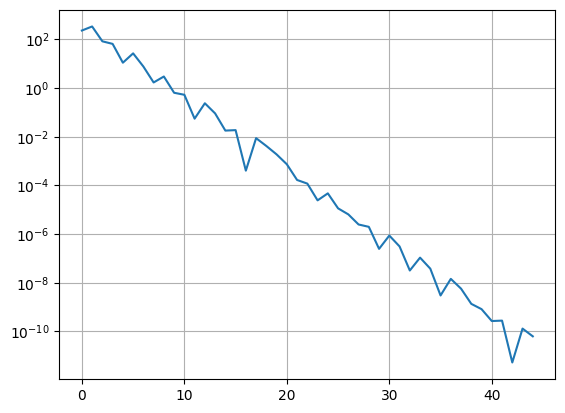

[2.28517000e+02 3.35052287e+02 8.23453782e+01 6.44979297e+01
 1.08786378e+01 2.62989506e+01 7.58534331e+00 1.67750338e+00
 2.94616300e+00 6.32395962e-01 5.23036498e-01 5.45589508e-02
 2.34268958e-01 8.98625514e-02 1.76536873e-02 1.84521599e-02
 3.99118351e-04 8.62731398e-03 4.11410519e-03 1.85749526e-03
 7.29188916e-04 1.65035398e-04 1.17041448e-04 2.39969821e-05
 4.65222309e-05 1.12626240e-05 6.36717937e-06 2.44772230e-06
 1.95972848e-06 2.43996965e-07 8.57865871e-07 3.06934453e-07
 3.14689714e-08 1.06264110e-07 3.73978537e-08 2.96438429e-09
 1.42522367e-08 5.64375569e-09 1.33979938e-09 8.12406142e-10
 2.63867150e-10 2.74440026e-10 5.22959454e-12 1.29034561e-10
 6.20730134e-11]



KeyboardInterrupt



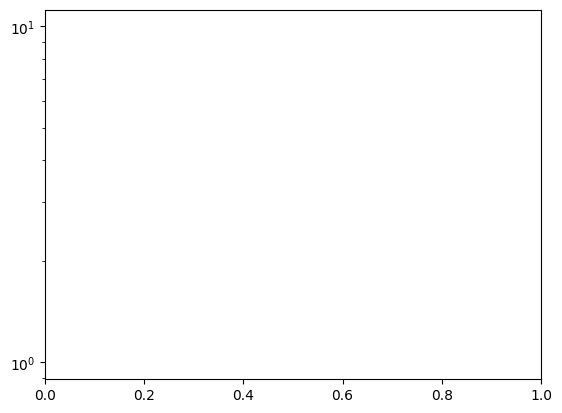


KeyboardInterrupt



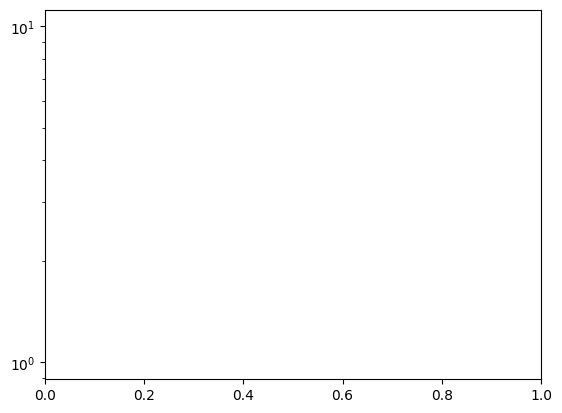

In [ ]:
import math
import numpy as np
def bisection_algorithm_vector(f, a, b, epsilon_f=1e-12):
    if f(a) * f(b) >= 0:
        print("The function must have different signs at a and b")
    
    iterations = 0
    solutions = np.array([])
    while (b - a) / 2 > epsilon_f:
        midpoint = (a + b) / 2
        f_midpoint = f(midpoint)
        solutions = np.append(solutions, abs(f_midpoint))
        if abs(f_midpoint) < epsilon_f:
            return midpoint, iterations
        
        if f(a) * f_midpoint < 0:
            b = midpoint
        else:
            a = midpoint
        
        iterations += 1

    midpoint = (a + b) / 2
    return solutions

def SecantAlgorithm_vector(f, x0, x1, epsilon=1e-12, max_iterations=1000):
    iterations = 0
    f_x0 = f(x0)
    f_x1 = f(x1)
    solutions = np.array([])
    while abs(x1 - x0) > epsilon and iterations < max_iterations:
        if abs(f_x1 - f_x0) < epsilon:
            print("The difference in function values is too small. Secant method may fail.")
            break  # Avoid division by a small number
        
        x_new = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        x0, x1 = x1, x_new
        f_x0, f_x1 = f_x1, f(x1)
        
        iterations += 1
        solutions = np.append(solutions, abs(f_x1))
        if abs(f_x1) < epsilon:
            break  # Stopping criterion based on function value

    return solutions


# Test the Secant algorithm on the test function
solutions = bisection_algorithm_vector(VelocityCalculator_750, 1, 50)
plt.semilogy(solutions, "Bisection")

solutions = SecantAlgorithm_vector(VelocityCalculator_750, 1, 50)
plt.semilogy(solutions, "Secant")
plt.grid(True)
plt.show()